# BayWheels with COVID-19 Imapct 🚲

Data Source: https://s3.amazonaws.com/baywheels-data/index.html

In this project, we will be investigating some critical attributes of the BayWheels usage in 2019 till 2020 June. We will give a particular focus on the data after March 2020, when COVID-19 hit our daily life on almost all aspects. How it influenced people's choice of commute? Let's explore! 

In [4]:
# import packages
from requests import get
from io import BytesIO
from zipfile import ZipFile
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

import datetime
import math
import calendar

## Data Gathering

In [5]:
# create a folder to hold csv files downloaded from the source
folder = 'bay_wheels_data'
os.makedirs(folder)

In [6]:
# download the datasets of year 2019

for month in np.arange(1,13):
    month_string = str(month)
    month_final = month_string.zfill(2)
    
    # since the name of the data files 2019 are not consistent; we need to fix this manually     
    if month >= 5:
        name = 'baywheels'
    else:
        name = 'fordgobike'
    
    bike_data_url = 'https://s3.amazonaws.com/baywheels-data/2019' + month_final + '-' + name + '-tripdata.csv.zip'
    r = get(bike_data_url)
        
    # open the zip file and returns a readable and writeable contents
    unzipped_file = ZipFile(BytesIO(r.content))
        
    # put the .csv file into the created folder
    unzipped_file.extractall(folder)

In [7]:
# download the datasets of year 2020. Only available till June 2020. 

for month in np.arange(1,7):
    month_string = str(month)
    month_final = month_string.zfill(2)

    bike_data_url = 'https://s3.amazonaws.com/baywheels-data/2020' + month_final + '-baywheels-tripdata.csv.zip'
    r = get(bike_data_url)
        
    # open the zip file and returns a readable and writeable contents
    unzipped_file = ZipFile(BytesIO(r.content))
        
    # put the .csv file into the created folder
    unzipped_file.extractall(folder)

In [10]:
# union the data into a list and concat them as dataframe 
list_bay_wheels_data = []

for csv_name in os.listdir(folder):
    list_bay_wheels_data.append(pd.read_csv(folder+'/'+csv_name))
    
df = pd.concat(list_bay_wheels_data)

## Data Cleaning and Wrangling

First, investigate the basic information of this data frame. 

In [11]:
df.shape

(3792668, 26)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3792668 entries, 0 to 183411
Data columns (total 26 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             float64
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  float64
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  Unnamed: 0               object 
 15  rental_access_method     object 
 16  ride_id                  object 
 17  rideable_type            object 
 18  started_at               object 
 19  ended_at                 object 
 20  start_lat                float64
 21  start_lng

In [13]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,60863.0,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36019.0,2019-09-30 16:16:32.3530,2019-10-01 02:16:51.9820,294.0,Pierce Ave at Market St,37.327581,-121.884559,443.0,3rd St at Keyes St,37.320866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5615.0,2019-09-30 23:12:25.9980,2019-10-01 00:46:01.9590,370.0,Jones St at Post St,37.787327,-122.413278,4.0,Cyril Magnin St at Ellis St,37.785881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1482.0,2019-09-30 23:57:34.6630,2019-10-01 00:22:16.8490,109.0,17th St at Valencia St,37.763316,-122.421904,460.0,Terry Francois Blvd at Warriors Way,37.769095,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1272.0,2019-09-30 23:53:28.6530,2019-10-01 00:14:41.0740,95.0,Sanchez St at 15th St,37.766219,-122.431060,127.0,Valencia St at 21st St,37.756708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
183407,480.0,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183408,313.0,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183409,141.0,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183410,139.0,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183411,271.0,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We found that the data structure changed dramatically from 2020-04 datasets. That change not only includes the column names, also there are missing contents. For example, in previous datasets, a column specifies the duration sections, but it disappears in the data set after 2020-04. Thus we need to calculate them manually.  

In this section, we will extract the columns we are interested in for further investigation and data visualization.  

In [106]:
df1 = pd.DataFrame()
for year in [2019, 2020]:
    for month in np.arange(1, 13):
        
        if year == 2020 and month >= 7:
            break
            
        filename = str(year) + '_' + str(month) + '.csv'
        filename = '/Users/Lei/Developer/Communicate with Data/bay_wheels_data/' + filename
        df_temp = pd.read_csv(filename)
        
        if year == 2020 and month >= 4:
            df_temp['user_type'] = 'Customer'
            df_temp[df_temp['member_casual'] == 'member']['user_type'] = 'Subsriber'
            df_temp['time_delta'] = pd.to_datetime(df_temp['ended_at']) - pd.to_datetime(df_temp['started_at'])
            df_temp['duration_sec'] = df_temp['time_delta'].apply(lambda x: x.total_seconds())
            
        df_temp = df_temp[['duration_sec', 'user_type', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']]
        df_temp['month'] = month
        df_temp['year'] = year
        df1 = pd.concat([df1, df_temp]).reset_index(drop=True)

/Users/Lei/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Lei/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Lei/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Lei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [107]:
#save the the results for further analysis
#df1.to_csv('/Users/Lei/Developer/Communicate with Data/bay_wheels_data/results.csv', index=False)

In [108]:
#check the columns in the result dataframe
list(df1)

Index(['duration_sec', 'user_type', 'start_station_latitude',
       'start_station_longitude', 'end_station_latitude',
       'end_station_longitude', 'month', 'year'],
      dtype='object')

In [109]:
#check the shape of the result datadrame 
df1.shape

(3792668, 8)

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3792668 entries, 0 to 3792667
Data columns (total 8 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             float64
 1   user_type                object 
 2   start_station_latitude   float64
 3   start_station_longitude  float64
 4   end_station_latitude     float64
 5   end_station_longitude    float64
 6   month                    int64  
 7   year                     int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 231.5+ MB


In [111]:
df1.head()

,duration_sec,user_type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,month,year
0,80825.0,Subscriber,37.775745,-122.213037,37.808894,-122.256460,1,2019
1,65900.0,Subscriber,37.785881,-122.408915,37.752428,-122.420628,1,2019
2,62633.0,Customer,37.870139,-122.268422,37.846784,-122.291376,1,2019
3,44680.0,Customer,37.770083,-122.429156,37.775946,-122.437777,1,2019
4,60709.0,Customer,37.794130,-122.394430,37.787168,-122.388098,1,2019


### What is the structure of the final dataframe? 

Ride information:

- duration_sec: This is calculated by start_time minus end_time, indicates the time interval in seconds 

- user_type: Contains two values, 'Subscriber' means registered customer and 'Customer' is random customers who use this product. 

Location: 

- start_station_latitude: the latitude of the station when customer get the bike
- start_station_longitude: the longitude of the station when customer get the bike
- end_station_latitude: the latitude of the station when customer return the bike
- end_station_longitude: the longitude of the station when customer return the bike

Time: 

- Year: year when the ride happened 
- Month: month when the ride happened 

In [113]:
df_clean = df1.copy()

## Data Visualization

### Univariate Exploration

### Question 1: What is the typically trip duration in 2019 and 2020? 

In this section, we will answer the question that how long does people use bike rental service during 20019 and 2020 - does it also impacted by COVID-19? 

In [218]:
# Calculate the duration of the bike rides in MINUTES
df_clean['duration_min'] = df_clean['duration_sec'] / 60

In [222]:
df_clean['duration_min'].describe()

count    3.792668e+06
mean     1.505276e+01
std      1.256268e+02
min     -1.405000e+01
25%      6.100000e+00
50%      9.850000e+00
75%      1.563333e+01
max      5.472887e+04
Name: duration_min, dtype: float64

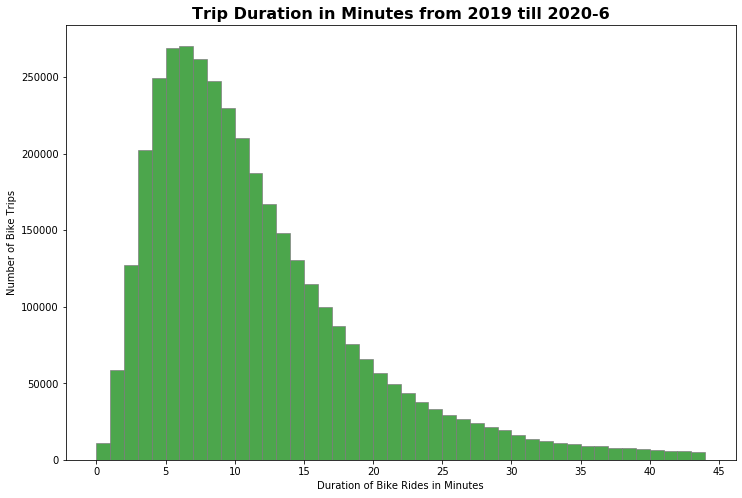

In [244]:
plt.figure(figsize = (12, 8))
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_clean, x = 'duration_min', bins = bin_edges, edgecolor = 'grey', color = 'green', alpha = 0.7)

plt.title("Trip Duration in Minutes from 2019 till 2020-6", fontsize=16, fontweight='bold')
plt.xlabel('Duration of Bike Rides in Minutes')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

It is a right-screwed distribution. Most rides fall below 15 mins, meaning the majority usage is the short commute distance. Now let's investigate the impact of COVID-19 by splitting the distribution by 2019 and 2020 datasets. 

Since we only have half-year data in 2020, we will investigate the PDF(probability density distribution) of the trip duration in 2019 and 2020. 

In [236]:
df_2019 = df_clean[df_clean['year'] == 2019]
df_2020 = df_clean[df_clean['year'] == 2020]

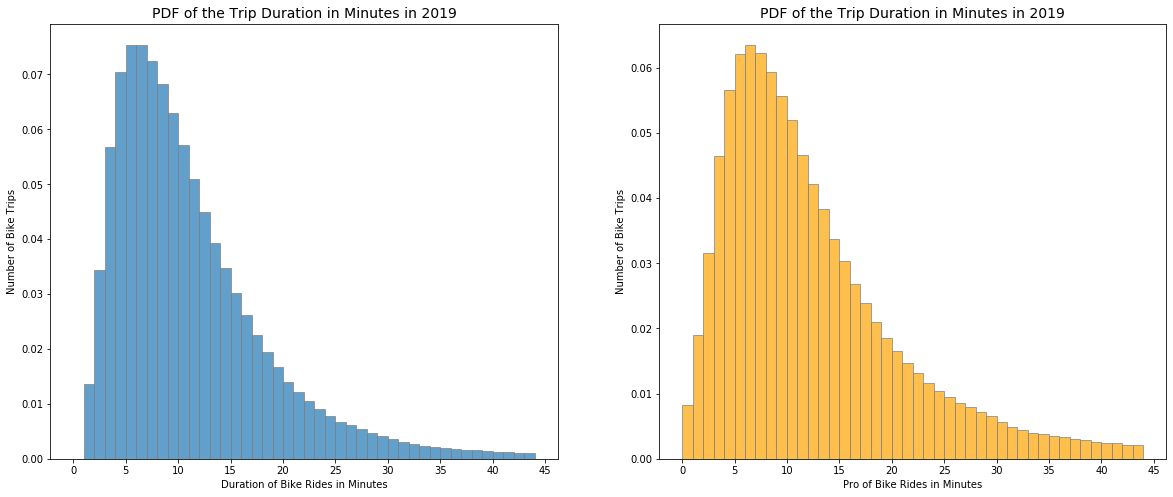

In [259]:
plt.figure(figsize = [20, 8]) # larger figure size for subplots

# histogram on left, 2019 Trip Duration in Minutes probability density distribution
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1

bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_2019, x = 'duration_min', bins = bin_edges, edgecolor = 'grey', alpha = 0.7,
        weights=np.ones_like(df_2019['duration_min']) / len(df_2019['duration_min']));

plt.xlabel('Duration of Bike Rides in Minutes')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');
plt.title("PDF of the Trip Duration in Minutes in 2019", fontsize=14);


# # histogram on right, Trip Duration in Minutes probability density distribution
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2

bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_2020, x = 'duration_min', bins = bin_edges, edgecolor = 'grey', color = 'orange', alpha = 0.7,
        weights=np.ones_like(df_2020['duration_min']) / len(df_2020['duration_min']))

plt.xlabel('Pro of Bike Rides in Minutes')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips')
plt.title("PDF of the Trip Duration in Minutes in 2019", fontsize=14);

From the above comparison in 2019 and 2020, both show a trend that the majority of the rides are below 20 mins. Both years indicated a trip with 7 mins is most frequent. However, we also noticed that a long trip ( > 30 mins) probability increased in 2020. Thay may due to the COVID-19 impact, as people will be more likely to include biking as a safer option for a longer commute. 

In [252]:
df_clean.head()

,duration_sec,user_type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,month,year,duration_min
0,80825.0,Subscriber,37.775745,-122.213037,37.808894,-122.256460,1,2019,1347.083333
1,65900.0,Subscriber,37.785881,-122.408915,37.752428,-122.420628,1,2019,1098.333333
2,62633.0,Customer,37.870139,-122.268422,37.846784,-122.291376,1,2019,1043.883333
3,44680.0,Customer,37.770083,-122.429156,37.775946,-122.437777,1,2019,744.666667
4,60709.0,Customer,37.794130,-122.394430,37.787168,-122.388098,1,2019,1011.816667


### Question 2: What is the typically trip distance in 2019 and 2020? 


First, we calculate the trip distance using **start_station_latitude, start_station_longitude, end_station_latitude** and **end_station_longitude**.

Reference distance calculation using two coordinates from https://pypi.org/project/geopy/. Geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.

In [310]:
# drop 648 records where there's NAN value in 'end_station_longitude', 'end_station_longitude'
df_clean.dropna(subset=['end_station_longitude', 'end_station_longitude'], inplace=True)

In [314]:
from geopy.distance import geodesic

list_distance = []

for i in range(df_clean.shape[0]):
    start_coordinates = (df_clean.iloc[i]['start_station_latitude'], df_clean.iloc[i]['start_station_longitude'])
    end_coordinates = (df_clean.iloc[i]['end_station_latitude'], df_clean.iloc[i]['end_station_longitude'])
    distance = geodesic(start_coordinates, end_coordinates).miles
    
    list_distance.append(distance)

In [315]:
df_clean['distance'] = list_distance

In [317]:
df_clean.head()

,duration_sec,user_type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,month,year,duration_min,distance
0,80825.0,Subscriber,37.775745,-122.213037,37.808894,-122.256460,1,2019,1347.083333,3.297669
1,65900.0,Subscriber,37.785881,-122.408915,37.752428,-122.420628,1,2019,1098.333333,2.394606
2,62633.0,Customer,37.870139,-122.268422,37.846784,-122.291376,1,2019,1043.883333,2.042037
3,44680.0,Customer,37.770083,-122.429156,37.775946,-122.437777,1,2019,744.666667,0.621512
4,60709.0,Customer,37.794130,-122.394430,37.787168,-122.388098,1,2019,1011.816667,0.592158


In [318]:
df_clean['distance'].describe()

count    3.792026e+06
mean     1.415296e+00
std      5.053576e+01
min      0.000000e+00
25%      5.628008e-01
50%      9.230590e-01
75%      1.458532e+00
max      7.959697e+03
Name: distance, dtype: float64

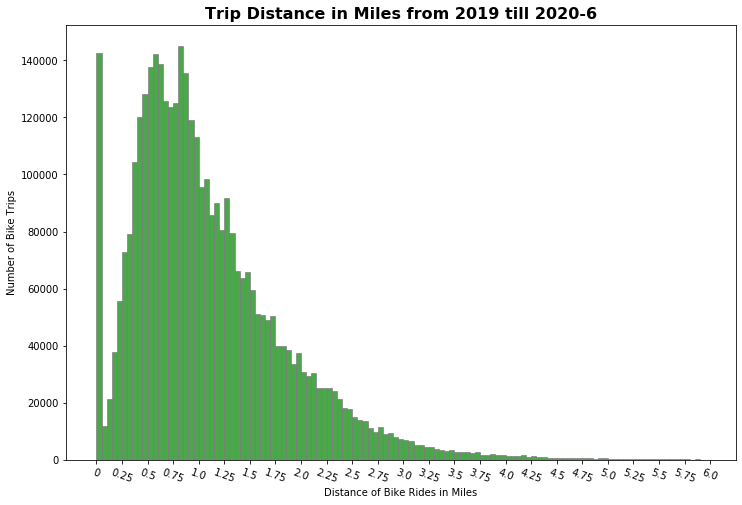

In [343]:
plt.figure(figsize = (12, 8))
bin_edges = np.arange(0, 6, 0.05)
ticks = [0, 0.25, 0.5, 0.75,1.00, 1.25, 1.5, 1.75, 2.00, 2.25, 2.5, 2.75, 3.00, 3.25, 3.5, 3.75, 4.00, 4.25, 4.5, 4.75, 5.00, 5.25, 5.5, 5.75, 6.00]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_clean, x = 'distance', bins = bin_edges, edgecolor = 'grey', color = 'green', alpha = 0.7)

plt.title("Trip Distance in Miles from 2019 till 2020-6", fontsize=16, fontweight='bold')
plt.xlabel('Distance of Bike Rides in Miles')
plt.xticks(ticks, labels, rotation = -20)
plt.ylabel('Number of Bike Trips');

In [342]:
len(df_clean[df_clean['distance'] == 0])

104351

Interesting Observation that there is a peak in the 0 to 0.05 mile category, more than 14000 trips occurred within that distance. However, there are 104351 cases within that category is 0. Meaning customers check our bike and return them at the same station. If we eliminate the outlines, it should be around 4000 cases. Still, most rides are below 1 mile, confirming our finding earlier that the bike rental is primarily for short commute distance. 

### Question 3: How many users are regular customers? 

We want to investigate the percentage of customers who registered and the casual customer who pass by and use our service. 

In [345]:
df_clean.head()

,duration_sec,user_type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,month,year,duration_min,distance
0,80825.0,Subscriber,37.775745,-122.213037,37.808894,-122.256460,1,2019,1347.083333,3.297669
1,65900.0,Subscriber,37.785881,-122.408915,37.752428,-122.420628,1,2019,1098.333333,2.394606
2,62633.0,Customer,37.870139,-122.268422,37.846784,-122.291376,1,2019,1043.883333,2.042037
3,44680.0,Customer,37.770083,-122.429156,37.775946,-122.437777,1,2019,744.666667,0.621512
4,60709.0,Customer,37.794130,-122.394430,37.787168,-122.388098,1,2019,1011.816667,0.592158


In [363]:
customer = df_clean[df_clean['user_type'] == 'Customer'].count()[0]
subscriber = df_clean[df_clean['user_type'] == 'Subscriber'].count()[0]
customer_prop = customer / df_clean.shape[0]
subscriber_prop = subscriber / df_clean.shape[0]

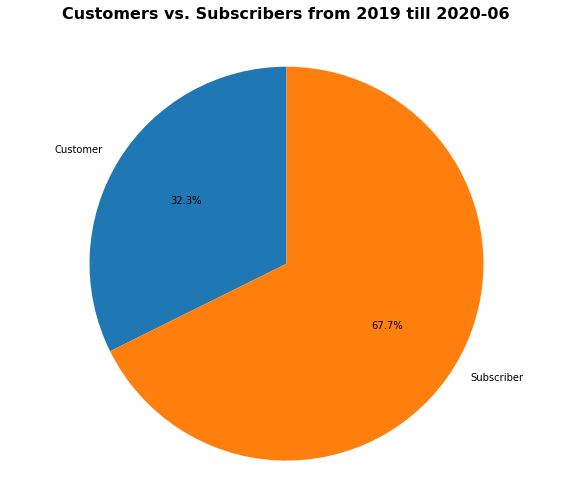

In [393]:
# pie chart
plt.figure(figsize = [10, 8])

labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]

plt.pie(size, labels = labels,autopct='%1.1f%%', startangle=90, textprops={'color':'black'})
plt.title('Customers vs. Subscribers from 2019 till 2020-06', y=1.05, fontsize=16, fontweight='bold');
plt.axis('equal');

We can see around two-thirds of users are regular subscribers. Will this data be different when looking at 2019 and 2020 separately? Does COVID-19 affect the customer profile ratio? 

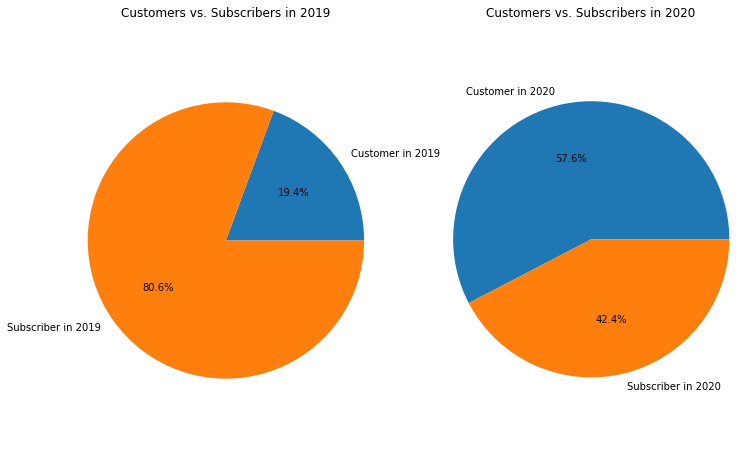

In [391]:
plt.figure(figsize = [12, 8])

plt.subplot(1, 2, 1) # first plot on the left, Customers vs. Subscribers in 2019 
customer_2019 = df_2019[df_2019['user_type'] == 'Customer'].count()[0]
subscriber_2019 = df_2019[df_2019['user_type'] == 'Subscriber'].count()[0]
customer_prop_2019 = customer_2019 / df_2019.shape[0]
subscriber_prop_2019 = subscriber_2019 / df_2019.shape[0]

labels_2019 = ['Customer in 2019', 'Subscriber in 2019']
size_2019 = [customer_prop_2019, subscriber_prop_2019]

plt.pie(size_2019, labels = labels_2019, autopct='%1.1f%%',textprops={'color':'black'})
plt.title('Customers vs. Subscribers in 2019');
plt.axis('equal');


plt.subplot(1, 2, 2) # first plot on the right, Customers vs. Subscribers in 2020 

customer_2020 = df_2020[df_2020['user_type'] == 'Customer'].count()[0]
subscriber_2020 = df_2020[df_2020['user_type'] == 'Subscriber'].count()[0]
customer_prop_2020 = customer_2020 / df_2020.shape[0]
subscriber_prop_2020 = subscriber_2020 / df_2020.shape[0]

labels_2020 = ['Customer in 2020', 'Subscriber in 2020']
size_2020 = [customer_prop_2020, subscriber_prop_2020]

plt.pie(size_2020, labels = labels_2020, autopct='%1.1f%%',textprops={'color':'black'})
plt.title('Customers vs. Subscribers in 2020');
plt.axis('equal');



The Customers vs. Subscribers comparison in 2019 and 2020 chart shows that in 2019, 80.6% of users are subscribers. The subscriber ratio dropped to 42.4% in 2020. More than half of users in 2020 (57.6%) are casual customers. It might be due to the users' demographical landscape - most of them use rental bikes for a short commute to/from work within the city. However, due to the significant impact of COVID-19, many companies followed state rule, and people tend to work from home. Thus the commute usage was dropped dramatically.  

### Bivariate Exploration

### Question 1: Which month yield highest rides in 2019 and 2020? 

In this section, we would like to understand the impact for bike ride numbers along each month. Due to the COVID-19, we assume the ride number will be affected. Thus, we need to split the data into two sets - 2019 and 2020. 

In [116]:
df_2019 = df_clean[df_clean['year'] == 2019]

In [117]:
df_2020 = df_clean[df_clean['year'] == 2020]

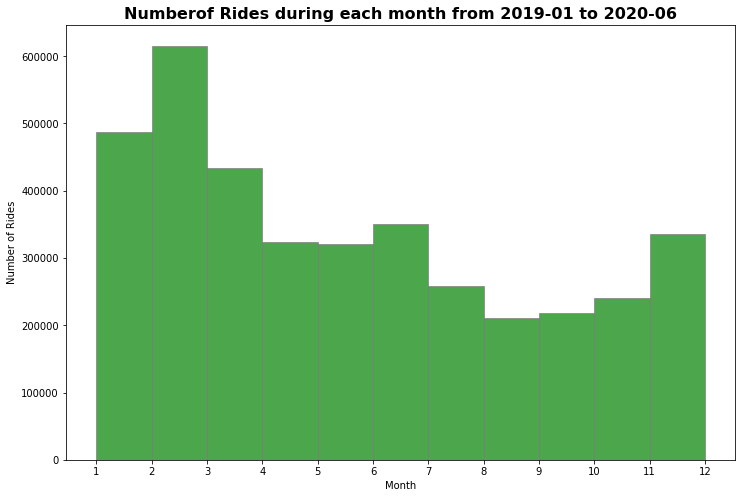

In [249]:
# first check the whole data sets
plt.figure(figsize = (12, 8))
bins = np.arange(1, 13)

plt.hist(data = df_clean, x = 'month', bins = bins, edgecolor='grey', alpha = 0.7, color = 'green')
plt.xticks(bins)
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Numberof Rides during each month from 2019-01 to 2020-06', fontsize=16, fontweight='bold');

In the histogram above, we noticed that it peaked in Q1 - Januray, February and March. This might due to the impact of coronavirus, where the rides dropped dramatically after March 2020. So let's take a look on the data in 2019 and 2020 seperately. 

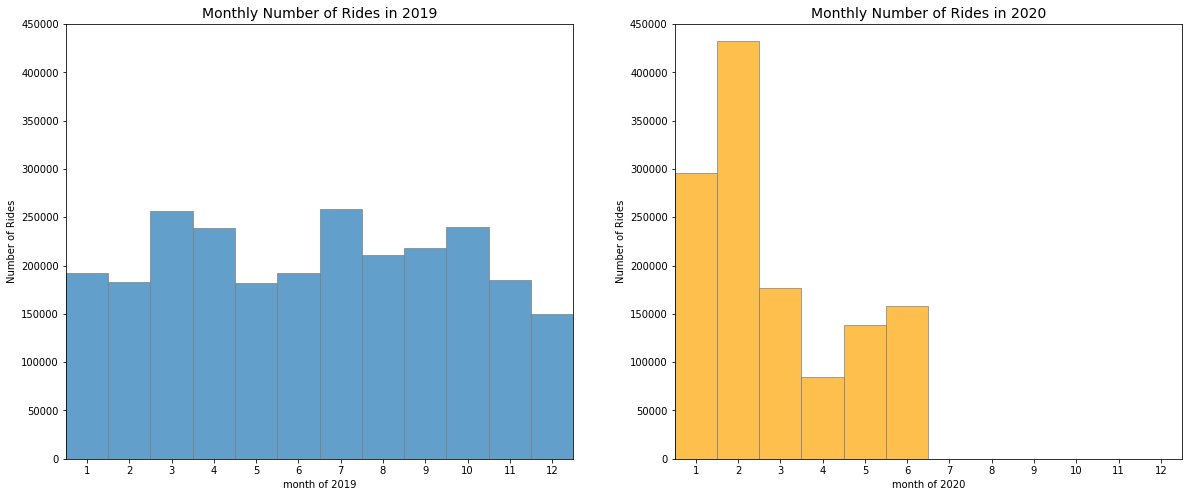

In [250]:
plt.figure(figsize = [20, 8]) # larger figure size for subplots

# histogram on left, 2019 total number of rides by month
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
plt.hist(data = df_2019, x = 'month', bins = np.arange(0.5, 12.6, 1), alpha = 0.7, edgecolor='grey')
plt.ylim([0, 450000])
plt.xticks(np.arange(1, 12.1));
plt.xlim([0.5, 12.5])
plt.xlabel('month of 2019')
plt.ylabel('Number of Rides')
plt.title('Monthly Number of Rides in 2019', fontsize=14)


# # histogram on right, 2020 total number of rides by month
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
plt.hist(data = df_2020, x = 'month', bins = np.arange(0.5, 12.6, 1), alpha = 0.7, edgecolor='grey', color = 'orange');
plt.ylim([0, 450000])
plt.xticks(np.arange(1, 12.1));
plt.xlim([0.5, 12.5])
plt.xlabel('month of 2020')
plt.ylabel('Number of Rides')
plt.title('Monthly Number of Rides in 2020', fontsize=14);

During 2019, the number of rides is correlated with weather. We can see from the histogram that the number of trips dropped during winter is slightly lower in Jan, Feb, Nov, and Dec. The number increased the peaked in 2020 Feb, and it dropped significantly in March 2020, due to the Shelter-In-Place order under COVID-19. It makes sense as people reduced commute and travel. Like other travel-related businesses,  the bike rental service takes lots of hits.  

The number of rides is lowest in April 2020, nearly 20% of the amount in 2020 Feb. From May to Jun 2020, the number of bike trips gradually increased, and it is also correlated with the gradual opening up and loosening of the SIP measures. 

In [344]:
df_clean.head()

,duration_sec,user_type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,month,year,duration_min,distance
0,80825.0,Subscriber,37.775745,-122.213037,37.808894,-122.256460,1,2019,1347.083333,3.297669
1,65900.0,Subscriber,37.785881,-122.408915,37.752428,-122.420628,1,2019,1098.333333,2.394606
2,62633.0,Customer,37.870139,-122.268422,37.846784,-122.291376,1,2019,1043.883333,2.042037
3,44680.0,Customer,37.770083,-122.429156,37.775946,-122.437777,1,2019,744.666667,0.621512
4,60709.0,Customer,37.794130,-122.394430,37.787168,-122.388098,1,2019,1011.816667,0.592158


### Question 2: How is the total travel distance changes along the months in 2019 and 2020? 

In this section, we will be investigating the distribution of the travel distance in each month across 2019 till Jun 2020. 

In [434]:
df_2019_boxplot = df_clean[df_clean['year'] == 2019][['month', 'distance']].copy()
df_2019_boxplot = df_2019_boxplot[df_2019_boxplot['distance'] < 5]
df_2020_boxplot = df_clean[df_clean['year'] == 2020][['month', 'distance']].copy()
df_2020_boxplot = df_2020_boxplot[df_2020_boxplot['distance'] < 5]

Text(0.5, 1.0, 'Travel Distance in each Month in 2020')

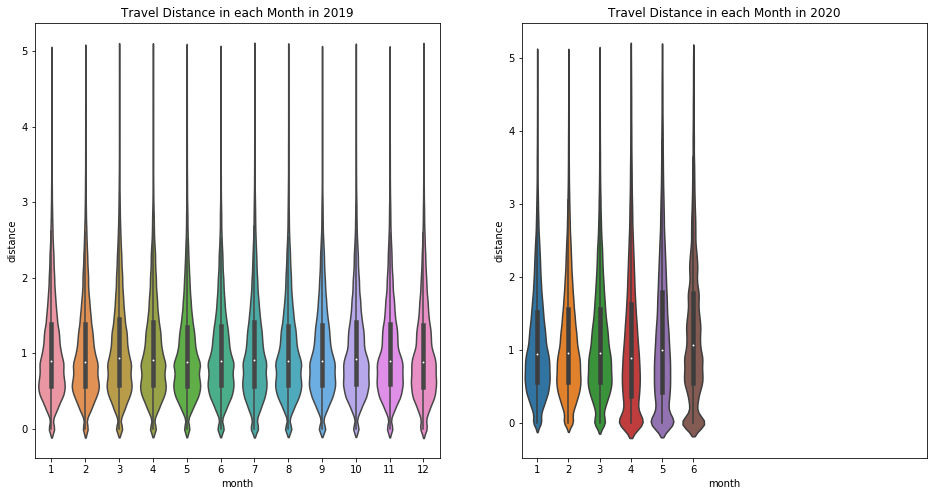

In [474]:
plt.subplots(figsize=(16, 8))
ax = plt.subplot(1, 2, 1)
sb.violinplot(x='month', y='distance', data=df_2019_boxplot, ax=ax)
plt.title('Travel Distance in each Month in 2019')

ax = plt.subplot(1, 2, 2)
sb.violinplot(x='month', y='distance', data=df_2020_boxplot, ax=ax)
plt.xlim([-0.5, 12.5])
plt.title('Travel Distance in each Month in 2020')

Data in 2019 shows a consistent trend. Most travel distances are less than 1.5 miles. In 2020, due to the impact of COVID-19, we see a pattern that short-distance travel and more extended distance travel are increased, and the average travel distance also raised slightly. 

## Multi-variant bears

### Question 1: How is the relationship between travel distance and time across 2019 and 2020?

Also, will there be any differences between customers and subscriber categories? 

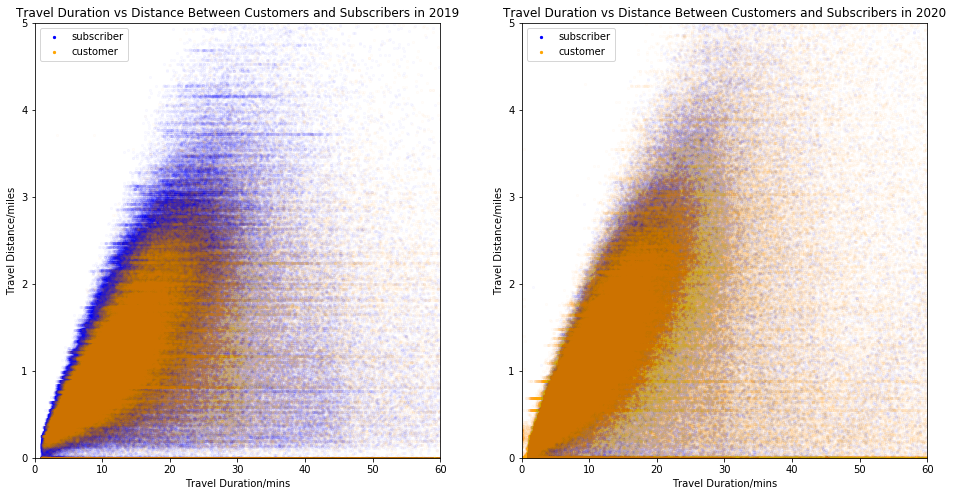

In [481]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
temp = df_clean[df_clean['year'] == 2019]
plt.scatter(temp[temp['user_type']=='Subscriber']['duration_min'], 
            temp[temp['user_type']=='Subscriber']['distance'], alpha=0.02, s=5, color='blue')
plt.scatter(temp[temp['user_type']=='Customer']['duration_min'], 
            temp[temp['user_type']=='Customer']['distance'], alpha=0.02, s=5, color='orange')
_ = plt.ylim([0, 5])
_ = plt.xlim([0, 60])

# show legends under low alpha value reference: https://stackoverflow.com/questions/12848808/set-legend-symbol-opacity-with-matplotlib
leg = plt.legend(['subscriber', 'customer'])
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.xlabel('Travel Duration/mins')
plt.ylabel('Travel Distance/miles')
plt.title('Travel Duration vs Distance Between Customers and Subscribers in 2019')


plt.subplot(1, 2, 2)
temp = df_clean[df_clean['year'] == 2020]
plt.scatter(temp[temp['user_type']=='Subscriber']['duration_min'], 
            temp[temp['user_type']=='Subscriber']['distance'], alpha=0.02, s=5, color='blue')
plt.scatter(temp[temp['user_type']=='Customer']['duration_min'], 
            temp[temp['user_type']=='Customer']['distance'], alpha=0.02, s=5, color='orange')
_ = plt.ylim([0, 5])
_ = plt.xlim([0, 60])
leg = plt.legend(['subscriber', 'customer'])
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.xlabel('Travel Duration/mins')
plt.ylabel('Travel Distance/miles')
plt.title('Travel Duration vs Distance Between Customers and Subscribers in 2020');

As we can see from the above chart, the customer base changed dramatically in 2020—less daily commute subscribers for a short time travel duration time and more casual customers. Also, more users are traveling long distance and time in 2020, as the slope is slightly raised in 2020.

## Summary

In this project, we focused on the impact of the COVID-19 on the travel sector of our daily life. We do so by comparing the datasets in 2019 and 2020 before June. We cleaned the data structure accordingly to make it a consistent and fair comparison. Due to the database change, there's limited information we can retrieve for this comparison. 
Here are some critical foundings of this project:

- Subscribers are mainly daily commuters who work in the city and prefer a healthy commute choice for short-distance travel.

- Customers could include residents, students who use this service on a random basis, mainly for errands across the city. 

- The Customers vs. Subscribers comparison in 2019 and 2020 chart shows that in 2019, 80.6% of users are subscribers. The subscriber ratio dropped to 42.4% in 2020. More than half of users in 2020 (57.6%) are casual customers. It might be due to the users' demographical landscape - most of them use rental bikes for a short commute to/from work within the city. However, due to the significant impact of COVID-19, many companies followed state rule, and people tend to work from home. Thus the commute usage was dropped dramatically.

- Typical Travel Distance: There is a peak in the 0 to 0.05-mile category, and more than 14000 trips occurred within that distance. However, there are 104351 cases within that category is 0. Meaning customers check our bike and return them at the same station. If we eliminate the outlines, it should be around 4000 cases. Still, most rides are below 1 mile, confirming our finding earlier that the bike rental is primarily for short commute distance.

- Travel Duration: From the comparison in 2019 and 2020, both show a trend that the majority of the rides are below 20 mins. Both years indicated a trip with 7 mins is most frequent. However, we also noticed that a long trip ( > 30 mins) probability increased in 2020. Thay may due to the COVID-19 impact, as people will be more likely to include biking as a safer option for a longer commute.

- Number of Rides: During 2019, the number of rides is correlated with weather. We can see from the histogram that the number of trips dropped during winter is slightly lower in Jan, Feb, Nov, and Dec. The number increased the peaked in 2020 Feb, and it dropped significantly in March 2020, due to the Shelter-In-Place order under COVID-19. It makes sense as people reduced commute and travel. Like other travel-related businesses, the bike rental service takes lots of hits. The number of rides is lowest in April 2020, nearly 20% of the amount in 2020 Feb. From May to Jun 2020, the number of bike trips gradually increased, and it is also correlated with the gradual opening up and loosening of the SIP measures.
